## Anscombe's Quartet

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/darenasc/eda/notebooks/anscombes_quartet.ipynb)

Code taken from https://www.geeksforgeeks.org/anscombes-quartet/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("https://query.data.world/s/6p2ntncvkzj5mnvbpkaswfilryvnrk")
print(df)

    x1  x2  x3  x4     y1    y2     y3     y4
0   10  10  10   8   8.04  9.14   7.46   6.58
1    8   8   8   8   6.95  8.14   6.77   5.76
2   13  13  13   8   7.58  8.74  12.74   7.71
3    9   9   9   8   8.81  8.77   7.11   8.84
4   11  11  11   8   8.33  9.26   7.81   8.47
5   14  14  14   8   9.96  8.10   8.84   7.04
6    6   6   6   8   7.24  6.13   6.08   5.25
7    4   4   4  19   4.26  3.10   5.39  12.50
8   12  12  12   8  10.84  9.13   8.15   5.56
9    7   7   7   8   4.82  7.26   6.42   7.91
10   5   5   5   8   5.68  4.74   5.73   6.89


In [3]:
# df
# mean values (x-bar)
x1_mean = df["x1"].mean()
x2_mean = df["x2"].mean()
x3_mean = df["x3"].mean()
x4_mean = df["x4"].mean()

# y-bar
y1_mean = df["y1"].mean()
y2_mean = df["y2"].mean()
y3_mean = df["y3"].mean()
y4_mean = df["y4"].mean()


# Standard deviation values (x-bar)
x1_std = df["x1"].std()
x2_std = df["x2"].std()
x3_std = df["x3"].std()
x4_std = df["x4"].std()

# Standard deviation values (y-bar)
y1_std = df["y1"].std()
y2_std = df["y2"].std()
y3_std = df["y3"].std()
y4_std = df["y4"].std()

# Correlation
correlation_x1y1 = np.corrcoef(df["x1"], df["y1"])[0, 1]
correlation_x2y2 = np.corrcoef(df["x2"], df["y2"])[0, 1]
correlation_x3y3 = np.corrcoef(df["x3"], df["y3"])[0, 1]
correlation_x4y4 = np.corrcoef(df["x4"], df["y4"])[0, 1]

# Linear Regression slope and intercept
m1, c1 = np.polyfit(df["x1"], df["y1"], 1)
m2, c2 = np.polyfit(df["x2"], df["y2"], 1)
m3, c3 = np.polyfit(df["x3"], df["y3"], 1)
m4, c4 = np.polyfit(df["x4"], df["y4"], 1)

# Residual sum of squares error
RSSY_1 = ((df["y1"] - (m1 * df["x1"] + c1)) ** 2).sum()
RSSY_2 = ((df["y2"] - (m2 * df["x2"] + c2)) ** 2).sum()
RSSY_3 = ((df["y3"] - (m3 * df["x3"] + c3)) ** 2).sum()
RSSY_4 = ((df["y4"] - (m4 * df["x4"] + c4)) ** 2).sum()

# Total sum of squares
TSS_1 = ((df["y1"] - y1_mean) ** 2).sum()
TSS_2 = ((df["y2"] - y2_mean) ** 2).sum()
TSS_3 = ((df["y3"] - y3_mean) ** 2).sum()
TSS_4 = ((df["y4"] - y4_mean) ** 2).sum()

# R squared (coefficient of determination)
R2_1 = 1 - (RSSY_1 / TSS_1)
R2_2 = 1 - (RSSY_2 / TSS_2)
R2_3 = 1 - (RSSY_3 / TSS_3)
R2_4 = 1 - (RSSY_4 / TSS_4)

# Create a pandas dataframe to represent the summary statistics
summary_stats = pd.DataFrame(
    {
        "Mean_x": [x1_mean, x2_mean, x3_mean, x4_mean],
        "Variance_x": [x1_std**2, x2_std**2, x3_std**2, x4_std**2],
        "Mean_y": [y1_mean, y2_mean, y3_mean, y4_mean],
        "Variance_y": [y1_std**2, y2_std**2, y3_std**2, y4_std**2],
        "Correlation": [
            correlation_x1y1,
            correlation_x2y2,
            correlation_x3y3,
            correlation_x4y4,
        ],
        "Linear Regression slope": [m1, m2, m3, m4],
        "Linear Regression intercept": [c1, c2, c3, c4],
    },
    index=["I", "II", "III", "IV"],
)
print(summary_stats.T)

                                     I         II        III         IV
Mean_x                        9.000000   9.000000   9.000000   9.000000
Variance_x                   11.000000  11.000000  11.000000  11.000000
Mean_y                        7.500909   7.500909   7.500000   7.500909
Variance_y                    4.127269   4.127629   4.122620   4.123249
Correlation                   0.816421   0.816237   0.816287   0.816521
Linear Regression slope       0.500091   0.500000   0.499727   0.499909
Linear Regression intercept   3.000091   3.000909   3.002455   3.001727


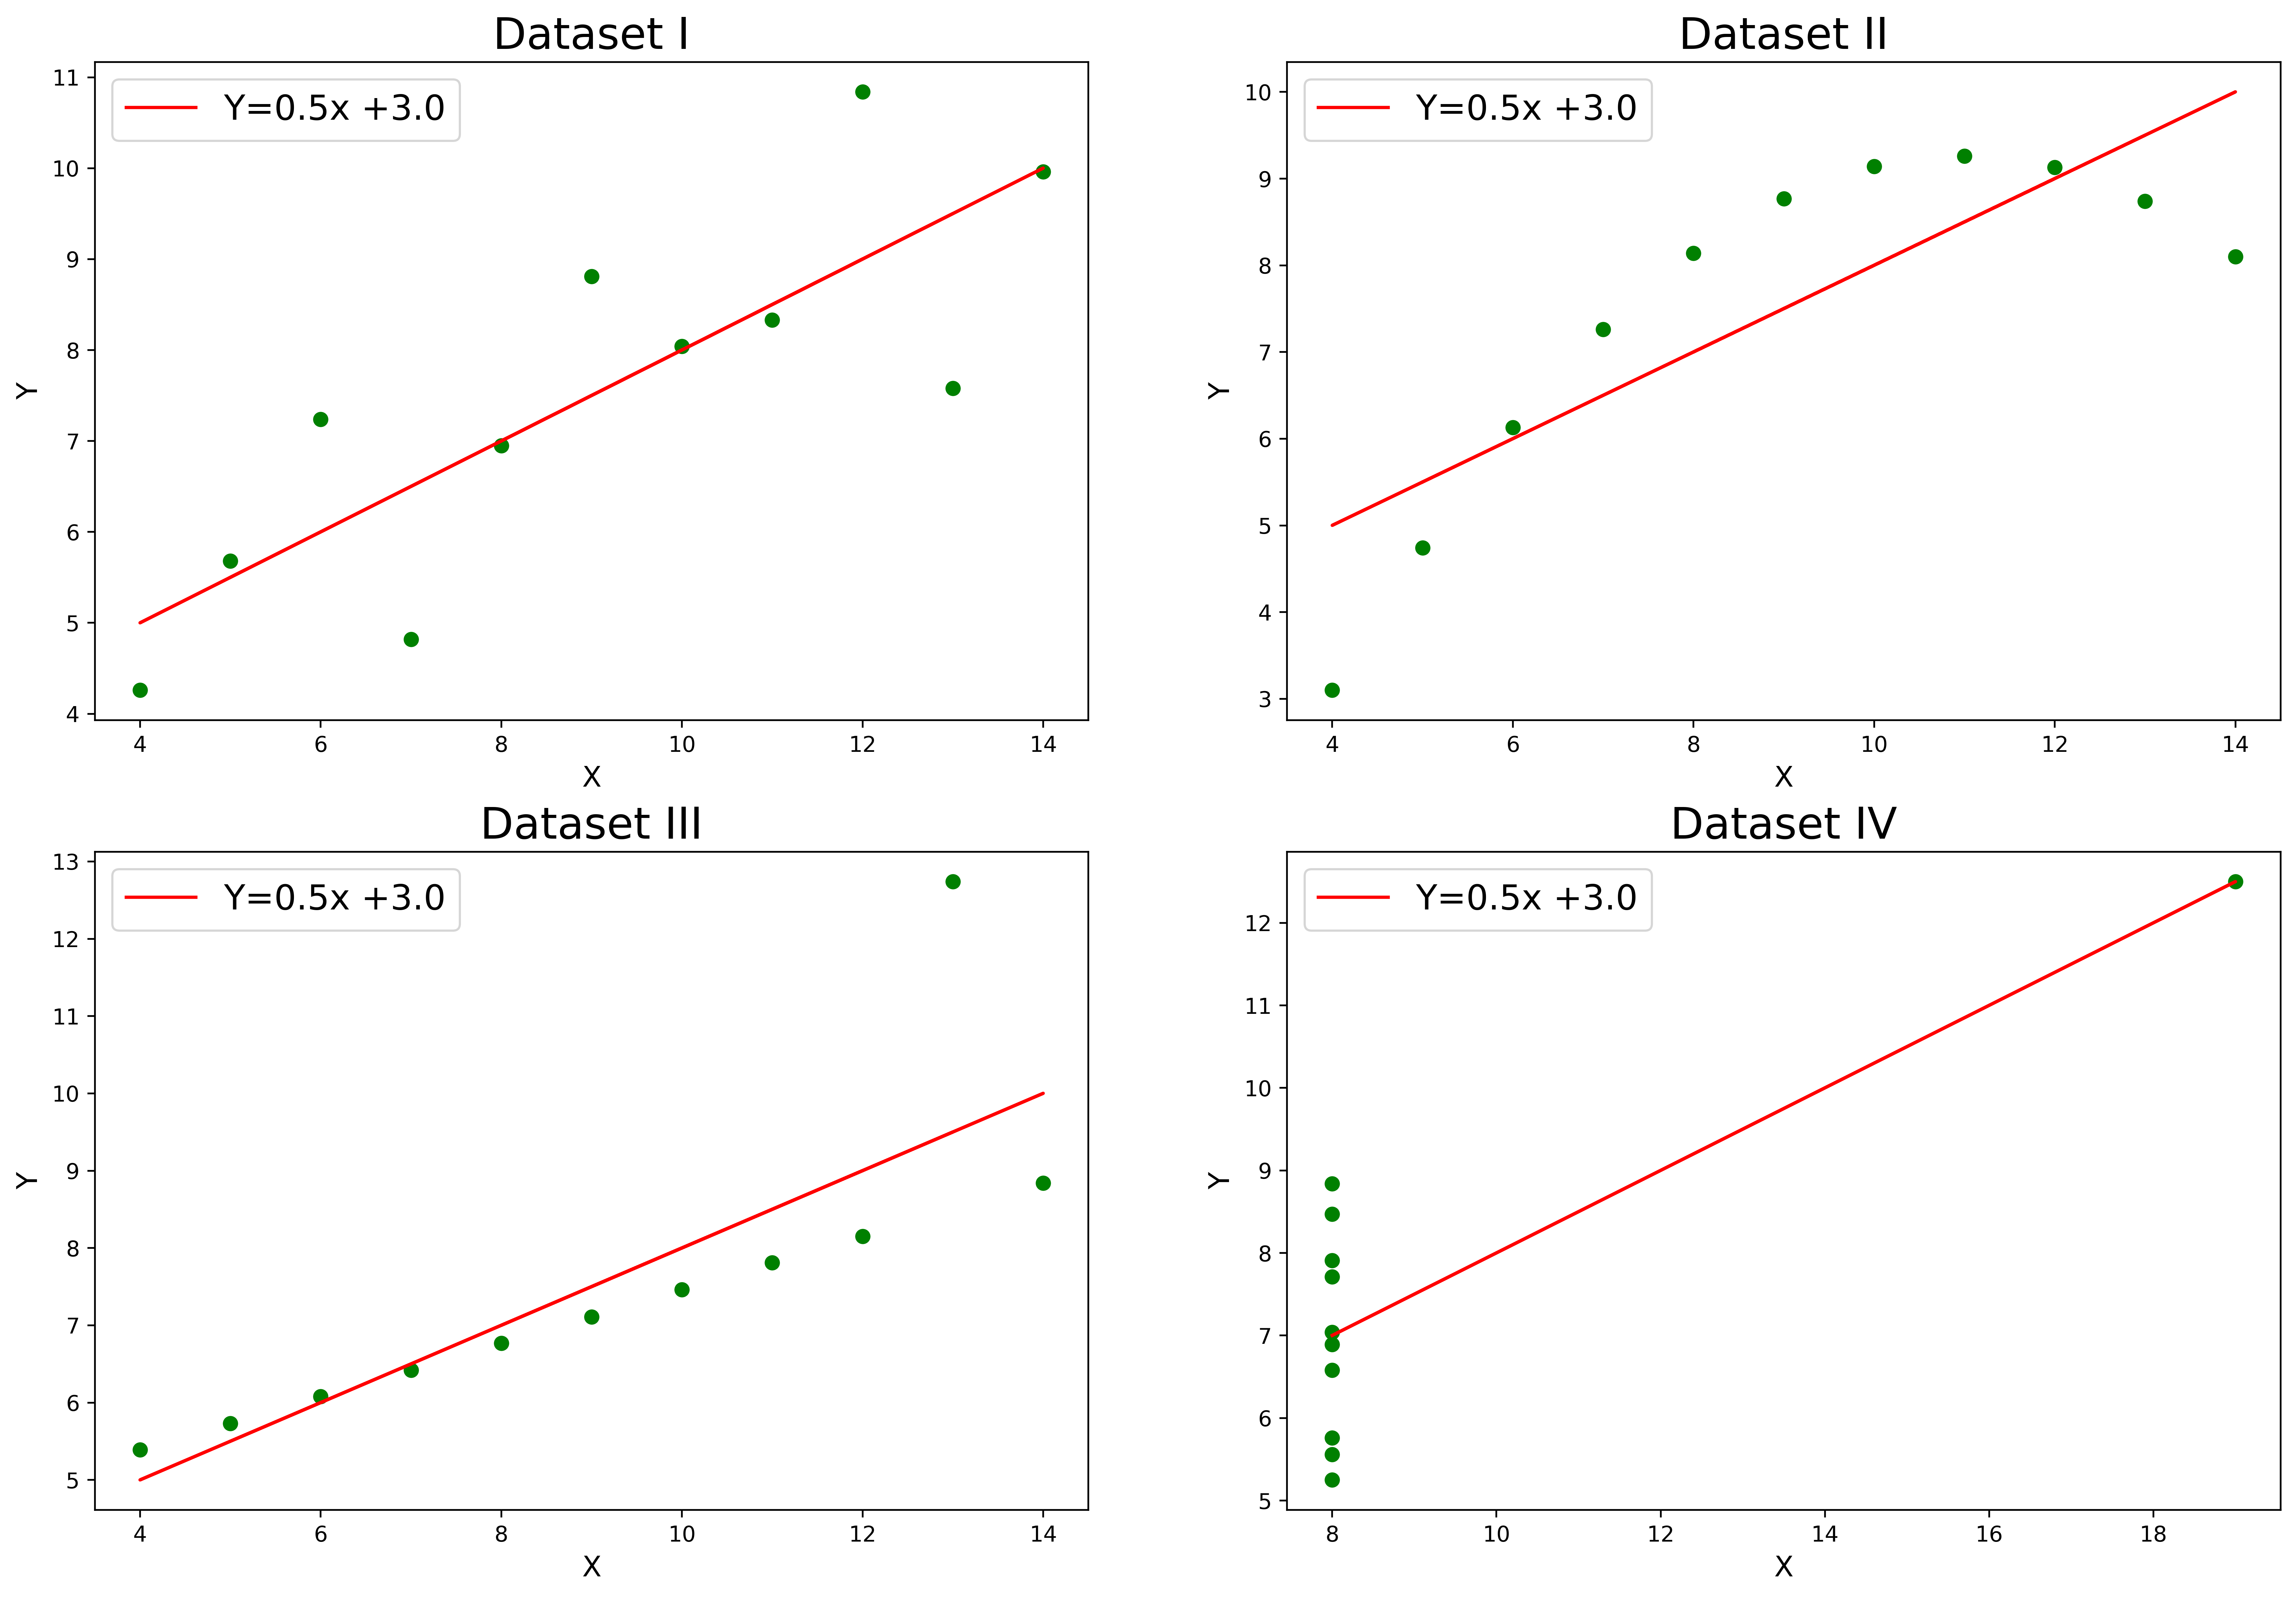

In [4]:
# plot all four plots
fig, axs = plt.subplots(2, 2, figsize=(18, 12), dpi=500)

axs[0, 0].set_title("Dataset I", fontsize=20)
axs[0, 0].set_xlabel("X", fontsize=13)
axs[0, 0].set_ylabel("Y", fontsize=13)
axs[0, 0].plot(df["x1"], df["y1"], "go")
axs[0, 0].plot(
    df["x1"],
    m1 * df["x1"] + c1,
    "r",
    label="Y=" + str(round(m1, 2)) + "x +" + str(round(c1, 2)),
)
axs[0, 0].legend(loc="best", fontsize=16)

axs[0, 1].set_title("Dataset II", fontsize=20)
axs[0, 1].set_xlabel("X", fontsize=13)
axs[0, 1].set_ylabel("Y", fontsize=13)
axs[0, 1].plot(df["x2"], df["y2"], "go")
axs[0, 1].plot(
    df["x2"],
    m2 * df["x2"] + c2,
    "r",
    label="Y=" + str(round(m2, 2)) + "x +" + str(round(c2, 2)),
)
axs[0, 1].legend(loc="best", fontsize=16)

axs[1, 0].set_title("Dataset III", fontsize=20)
axs[1, 0].set_xlabel("X", fontsize=13)
axs[1, 0].set_ylabel("Y", fontsize=13)
axs[1, 0].plot(df["x3"], df["y3"], "go")
axs[1, 0].plot(
    df["x3"],
    m1 * df["x3"] + c1,
    "r",
    label="Y=" + str(round(m3, 2)) + "x +" + str(round(c3, 2)),
)
axs[1, 0].legend(loc="best", fontsize=16)

axs[1, 1].set_title("Dataset IV", fontsize=20)
axs[1, 1].set_xlabel("X", fontsize=13)
axs[1, 1].set_ylabel("Y", fontsize=13)
axs[1, 1].plot(df["x4"], df["y4"], "go")
axs[1, 1].plot(
    df["x4"],
    m4 * df["x4"] + c4,
    "r",
    label="Y=" + str(round(m4, 2)) + "x +" + str(round(c4, 2)),
)
axs[1, 1].legend(loc="best", fontsize=16)

plt.show()